In [19]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
from simulation import Simulation
from glob import glob
from matplotlib import pyplot as plt
from matplotlib import ticker

In [20]:
# year, black, pov, smoking state

In [21]:
data_files = sorted(glob('../../outputs/numpy_arrays/*'))
data_files

['../../outputs/numpy_arrays/np_output_2022-02-26_10-31-08-506096.npy',
 '../../outputs/numpy_arrays/np_output_2022-03-29_15-33-27-166038.npy',
 '../../outputs/numpy_arrays/np_output_2022-03-29_15-33-37-113877.npy',
 '../../outputs/numpy_arrays/np_output_2022-04-15_11-38-47-651364.npy',
 '../../outputs/numpy_arrays/np_output_2022-04-15_11-39-20-499748.npy',
 '../../outputs/numpy_arrays/np_output_menthol_ban_1_1_2022-04-22_15-52-22-795464.npy',
 '../../outputs/numpy_arrays/np_output_menthol_ban_2022-03-29_16-32-28-744841.npy',
 '../../outputs/numpy_arrays/np_output_menthol_ban_2022-03-29_21-26-16-555701.npy']

In [22]:
arr2 = np.load(data_files[-1])
arr = np.load(data_files[-3])

In [23]:
arr.shape

(51, 2, 2, 6)

In [24]:

arr_year_smoking_state = None
arr2_year_smoking_state = None

arr_year_smoking_state = np.sum(arr,axis=(1,2))
arr2_year_smoking_state = np.sum(arr2,axis=(1,2))
arr_year_smoking_state.shape

(51, 6)

In [25]:
arr_year_smoking_state /= 1e6
arr2_year_smoking_state /= 1e6

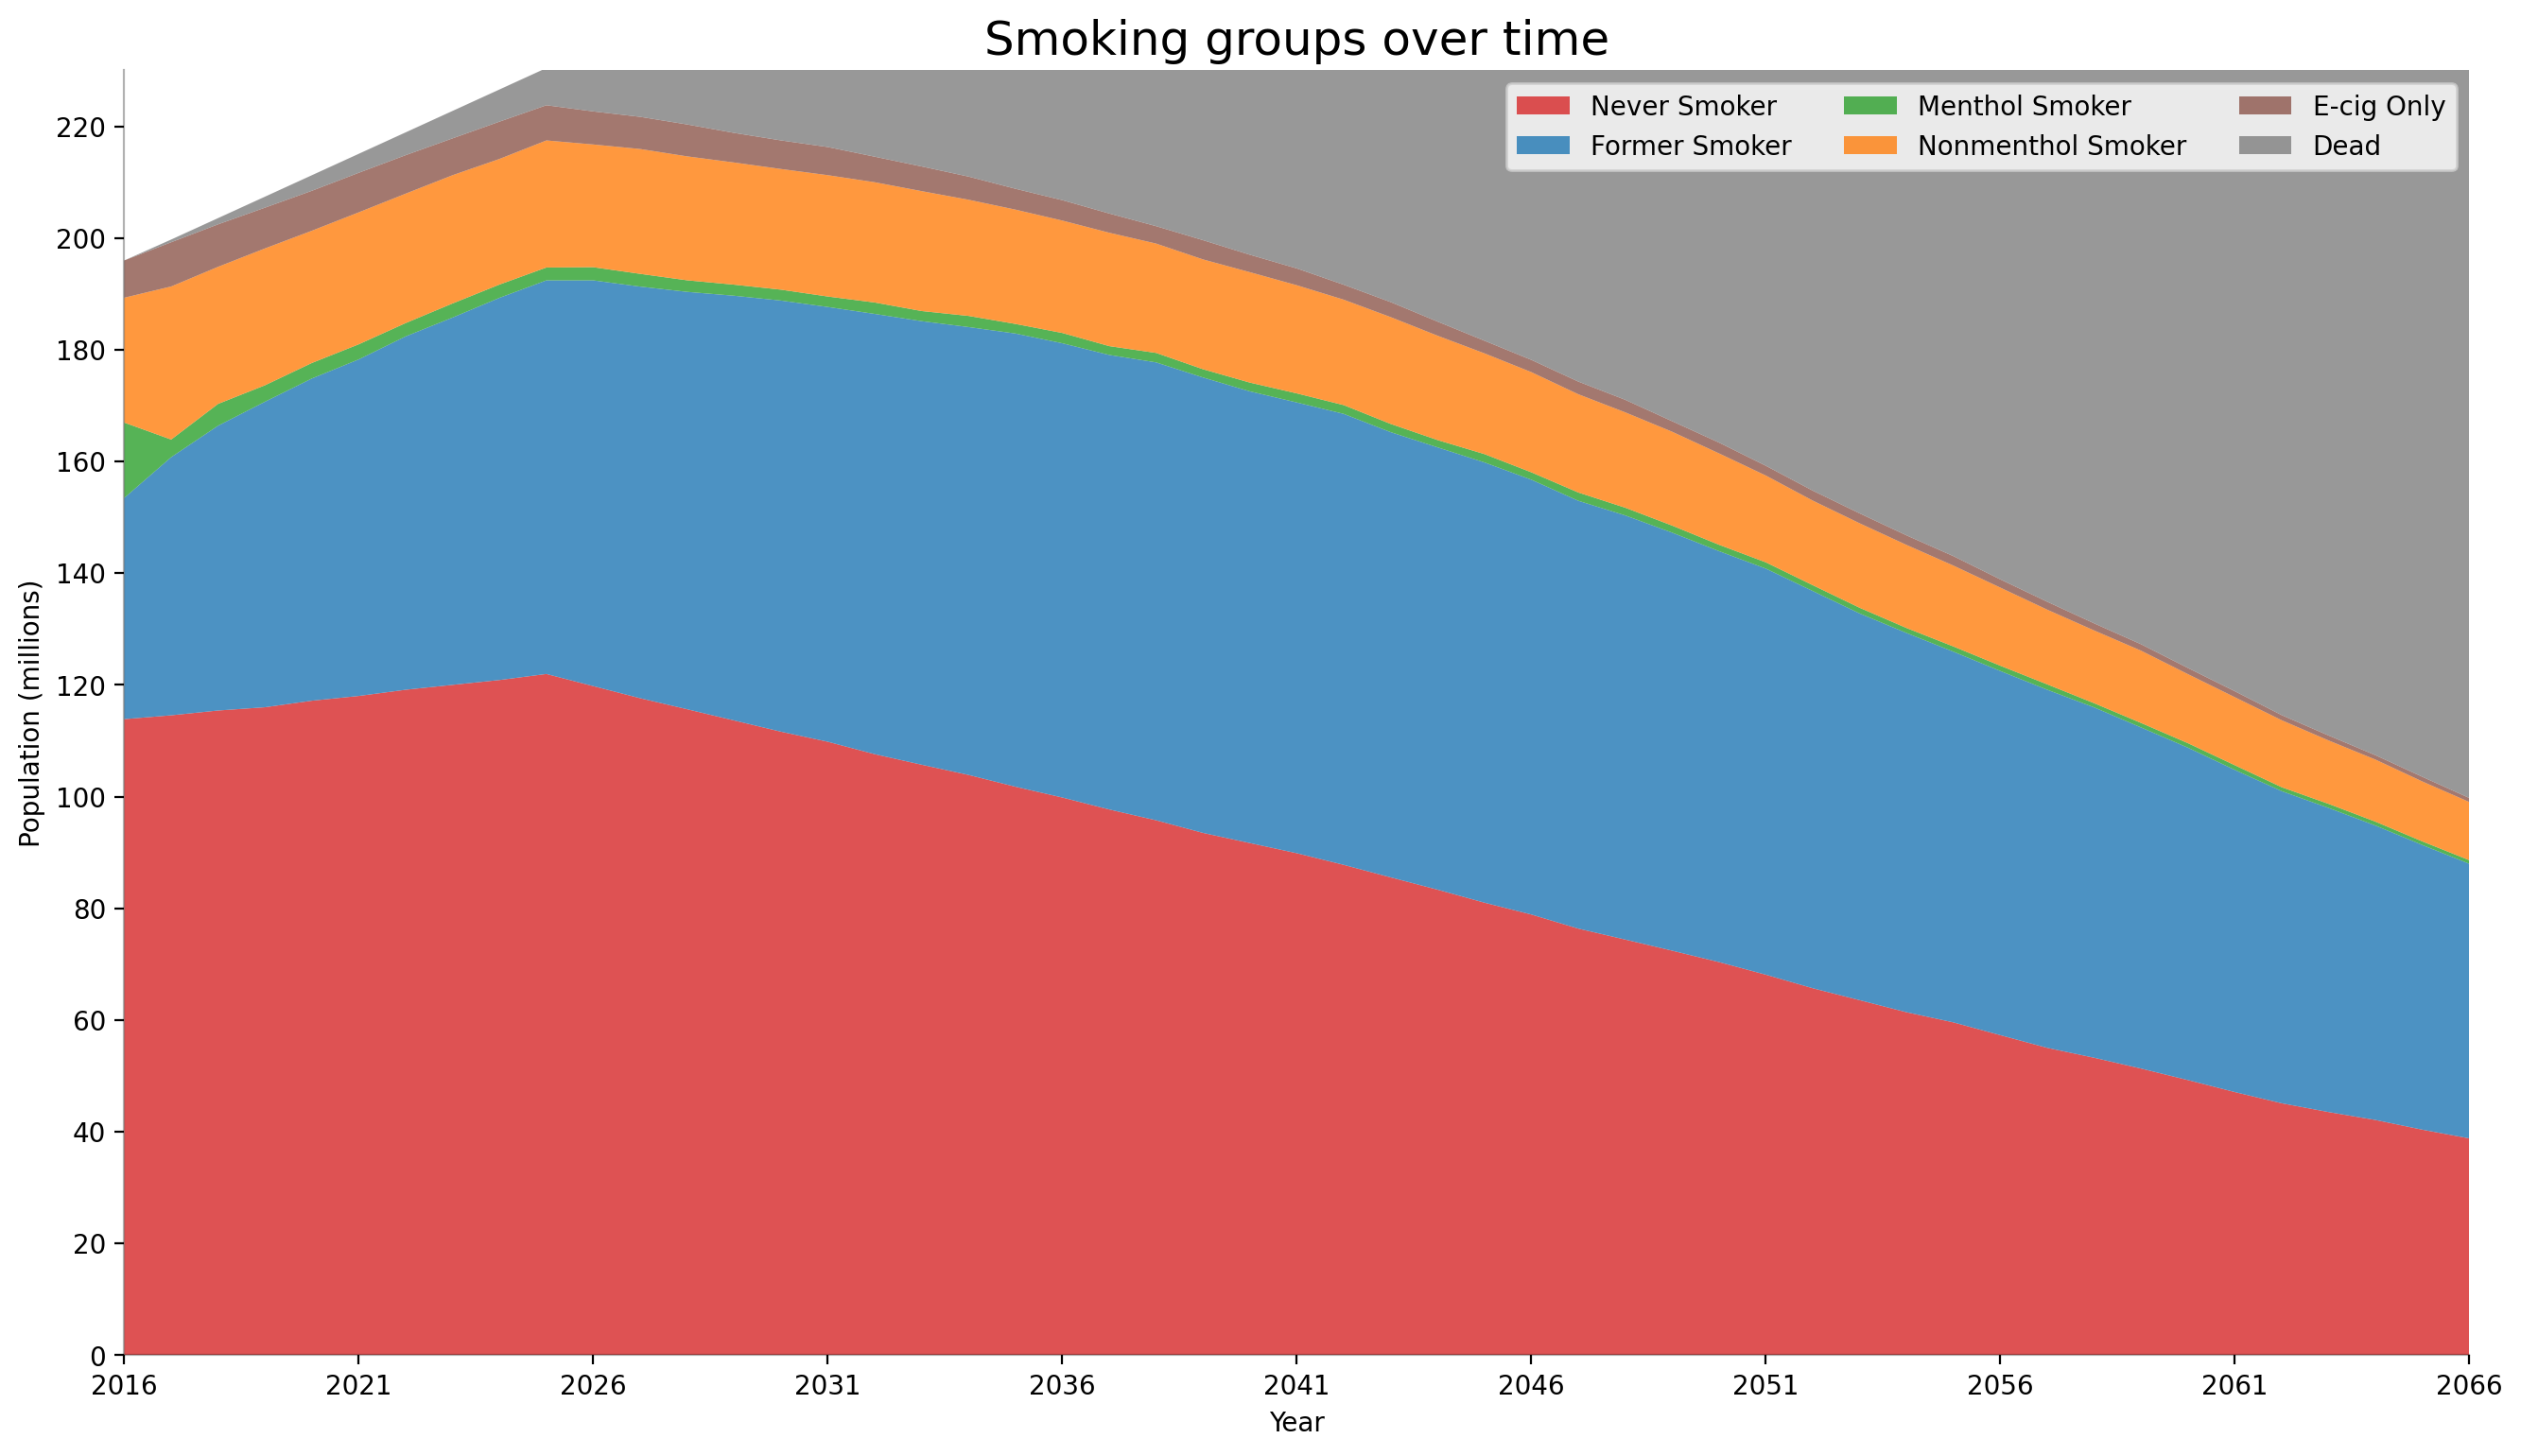

In [26]:
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey',]

fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=200)
labels = ["Never Smoker", "Former Smoker", "Menthol Smoker", "Nonmenthol Smoker", "E-cig Only", "Dead"]

x = np.arange(2016, 2016 + arr_year_smoking_state.shape[0])
y = np.vstack([arr_year_smoking_state[:,i] for i in range(arr_year_smoking_state.shape[1])])

ax = plt.gca()
ax.stackplot(x,y,labels=labels, colors=mycolors, alpha=0.8)

# for i in x:
#     ax.axvline(x=i, c="black")

ax.set_title('Smoking groups over time', fontsize=18)
ax.set(ylim=[0, 2.3e2])
ax.legend(fontsize=10, ncol=3)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(0,2.3e2,2e1,dtype=np.int64), fontsize=10)
plt.xlim(x[0], x[-1])
plt.xlabel("Year")
plt.ylabel("Population (millions)")

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)


In [27]:
arr_year_smoking_state.shape

(51, 6)

In [28]:
arr_no_dead = arr_year_smoking_state[:,:-1]
arr2_no_dead = arr2_year_smoking_state[:,:-1]
arr_no_dead.shape

(51, 5)

In [29]:
arr_no_dead_percents = arr_no_dead / np.sum(arr_no_dead, axis=1).reshape(-1,1) * 100
arr2_no_dead_percents = arr2_no_dead / np.sum(arr2_no_dead, axis=1).reshape(-1,1) * 100
arr_no_dead_percents[10,:]

array([53.79628597, 32.62053723,  1.0582243 ,  9.8663952 ,  2.65855729])

Text(0.5, 1.0, 'Proportion of smoking groups in the living population')

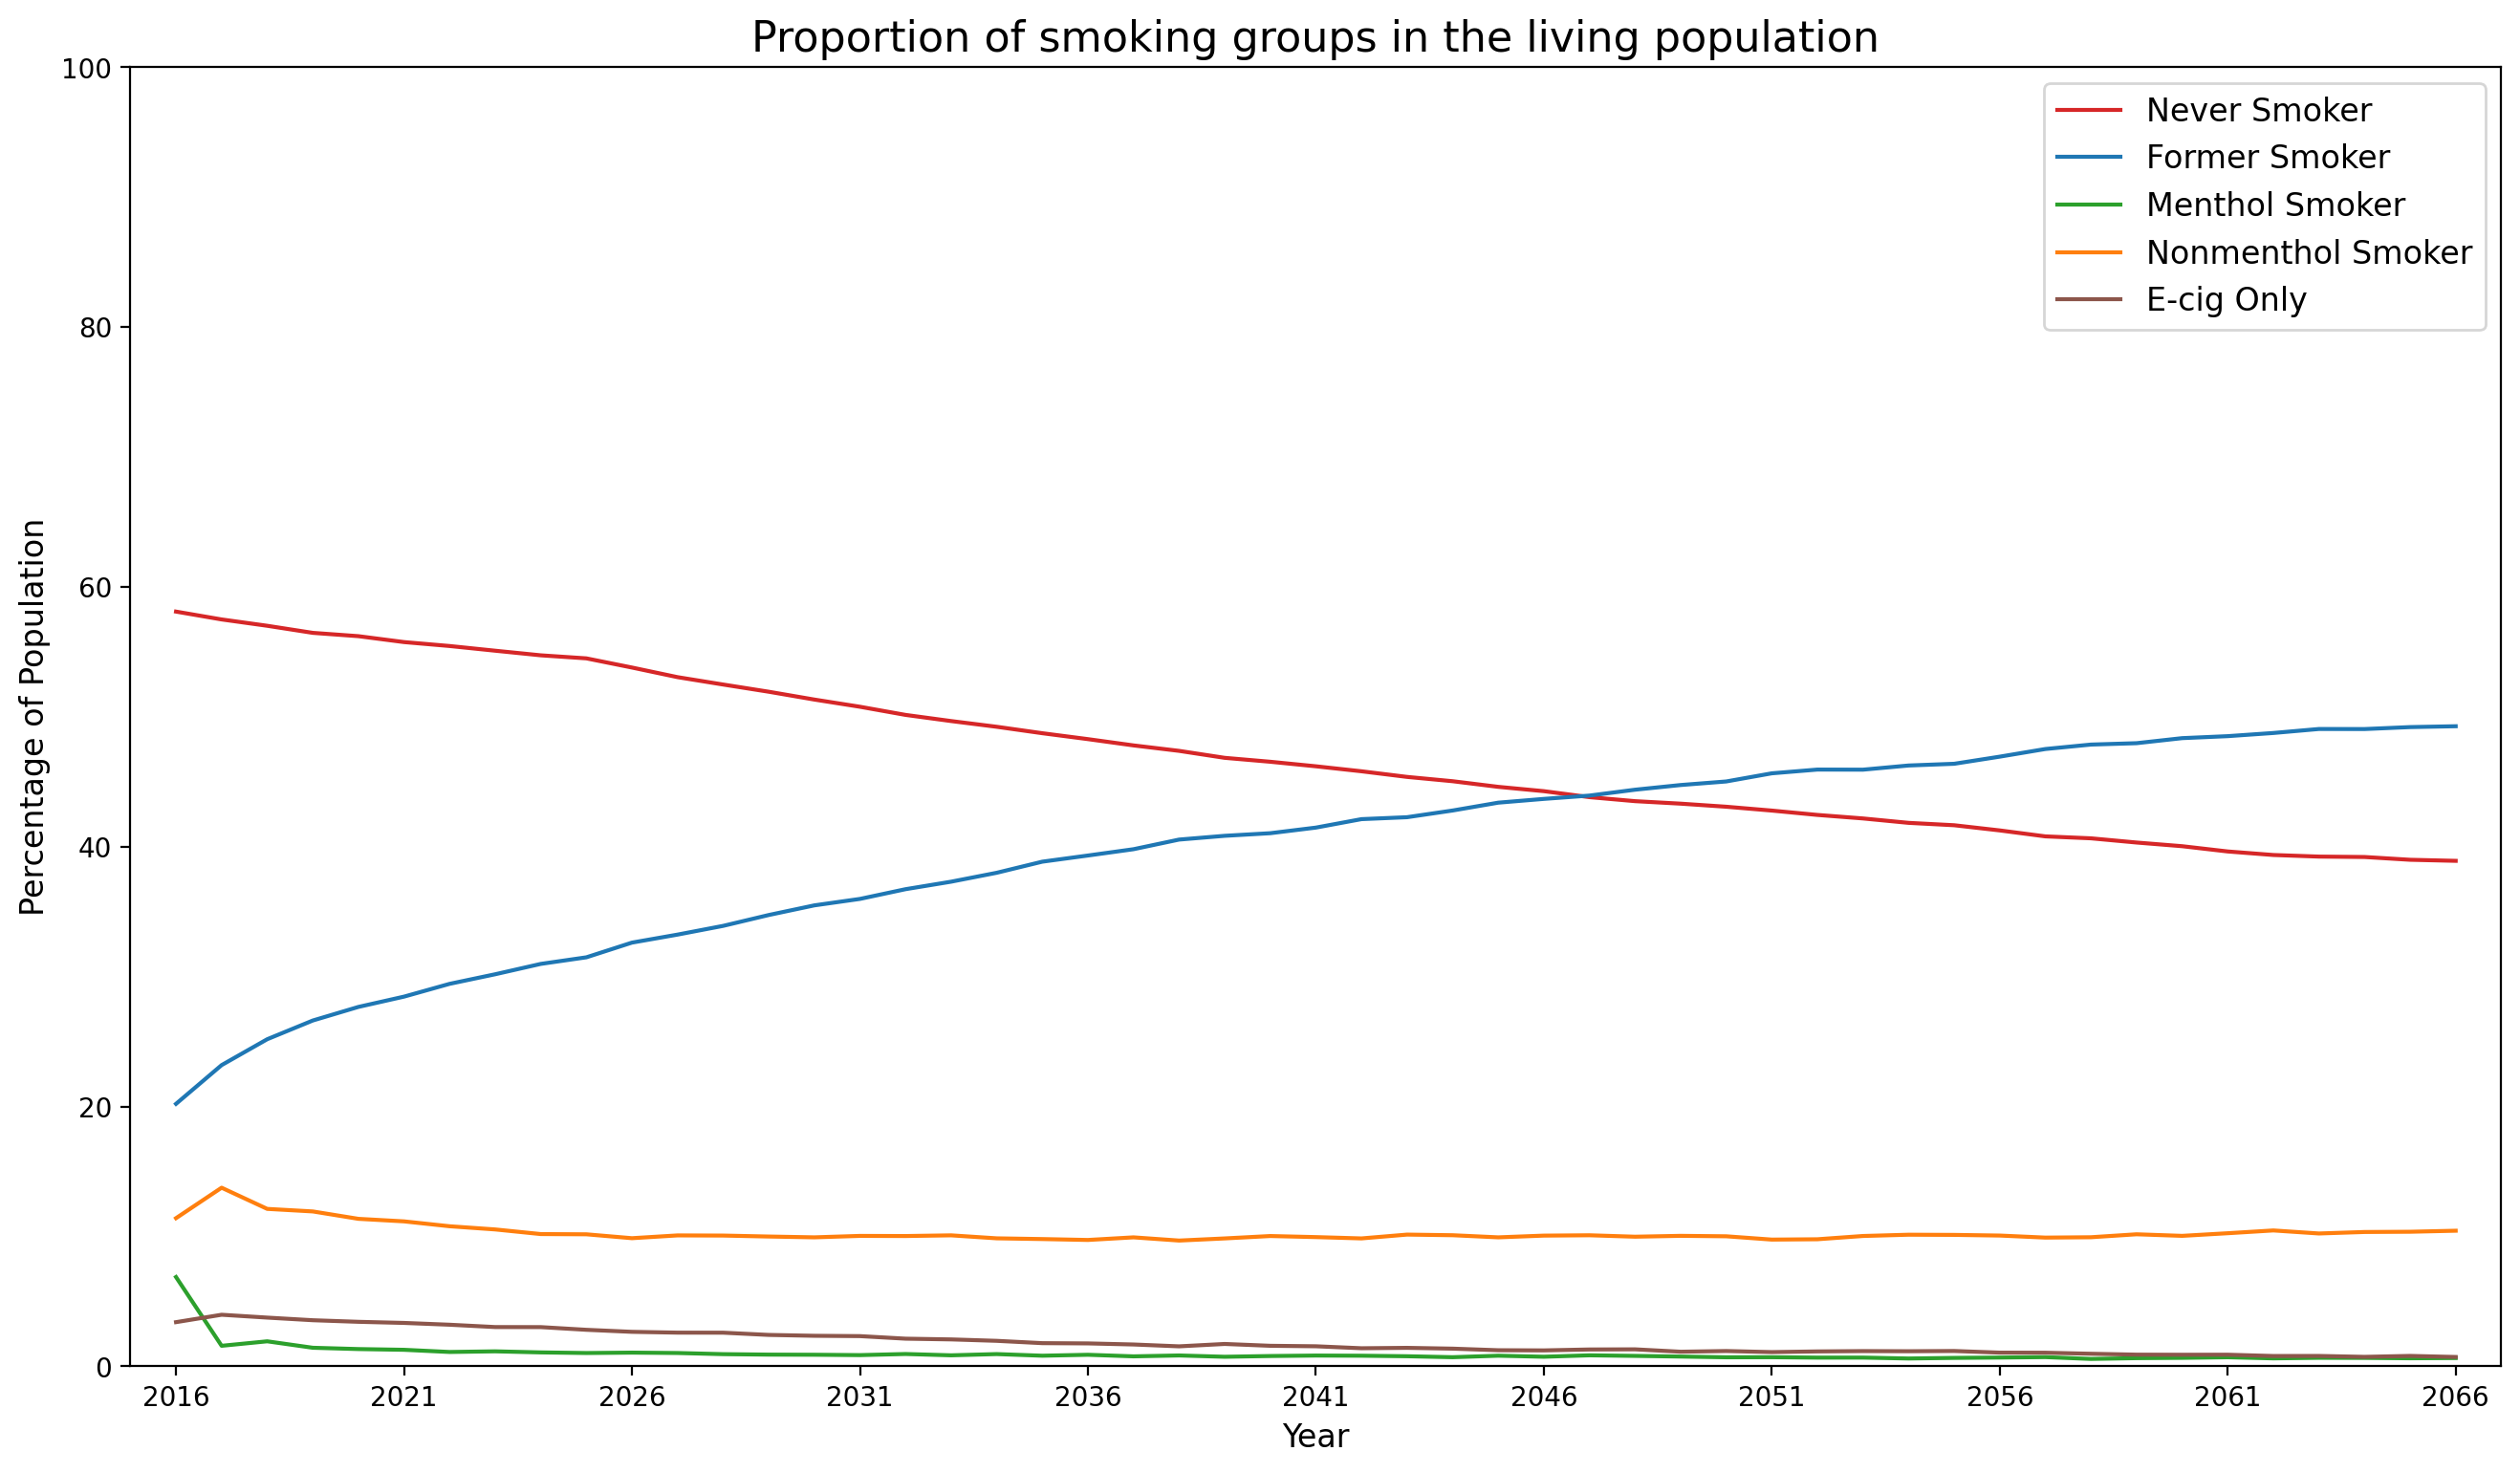

In [30]:
fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=200)
ax.plot(x, arr_no_dead_percents[:,0], mycolors[0],
        x, arr_no_dead_percents[:,1], mycolors[1],
        x, arr_no_dead_percents[:,2], mycolors[2],
        x, arr_no_dead_percents[:,3], mycolors[3],
        x, arr_no_dead_percents[:,4], mycolors[4])

plt.ylim(0,100)
plt.xlim(x[0]-1, x[-1]+1)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Population", fontsize=12)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
ax.legend(labels, fontsize=12, ncol=1)

plt.title("Proportion of smoking groups in the living population", fontsize=16)

# for i in range(len(mycolors)-1):
#         ax.get_lines()[i].set_color(mycolors[i])

# len(ax.get_lines())
# len(mycolors)

Text(0.5, 1.0, 'Effect of menthol ban on proportion of smokers')

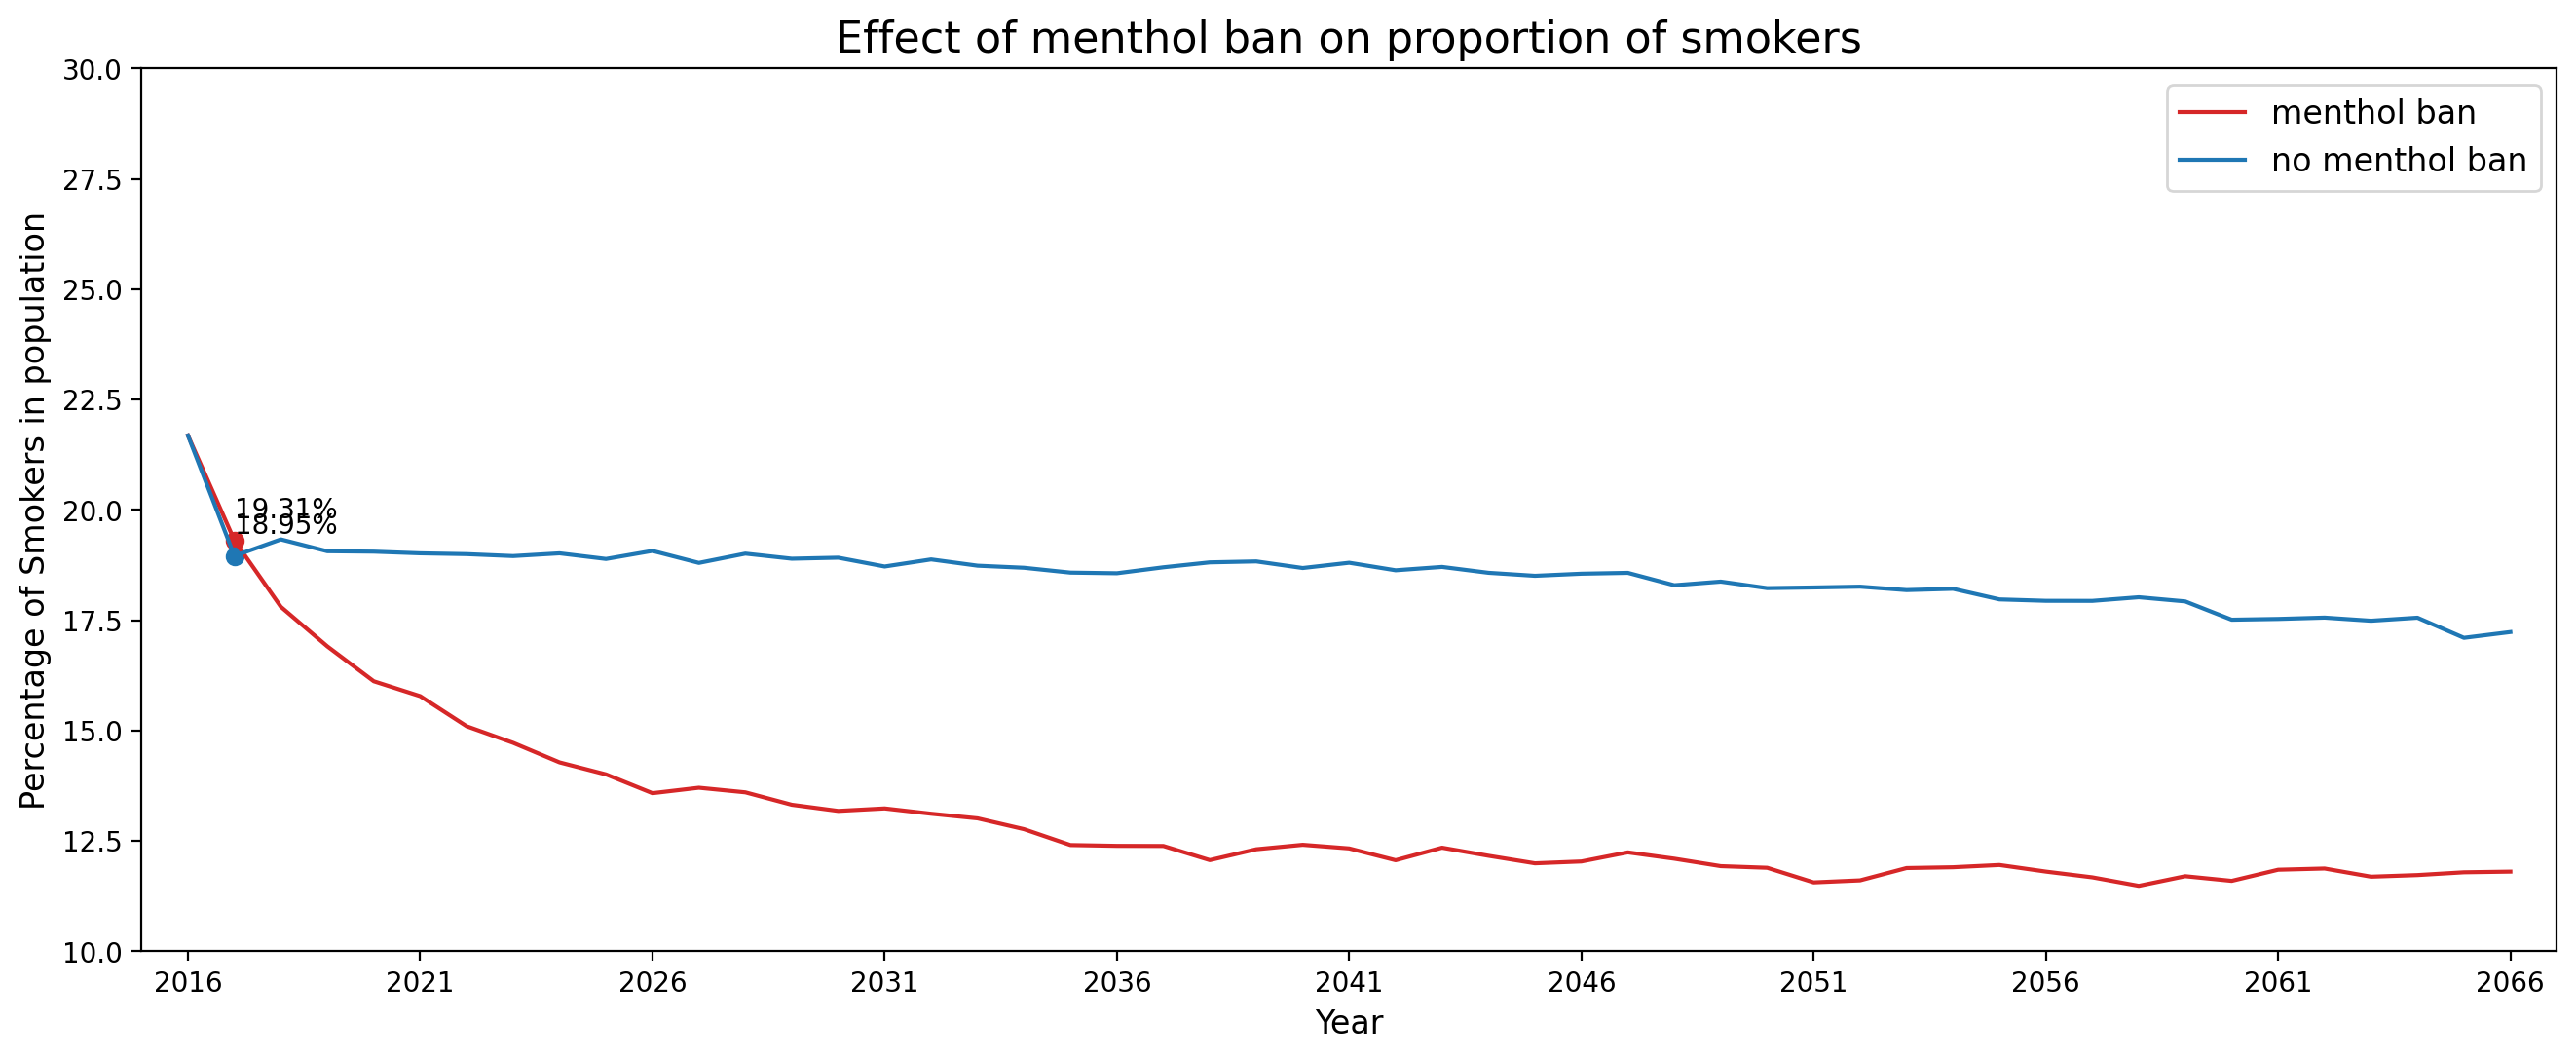

In [31]:
fig, ax = plt.subplots(1,1,figsize=(16,6), dpi=200)
y = np.sum(arr_no_dead_percents[:,2:], axis=1)
y2 = np.sum(arr2_no_dead_percents[:,2:], axis=1)

ax.plot(x, y, mycolors[0])
ax.plot(x, y2, mycolors[1])

plt.ylim(10,30)
plt.xlim(x[0]-1, x[-1]+1)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Smokers in population", fontsize=12)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
# ax.legend(["complex death rate", "average death rate"], fontsize=12, ncol=1)
ax.legend(["menthol ban", "no menthol ban"], fontsize=12, ncol=1)
for i,j in zip(x, y):
    # if (i - 2016) % 5 == 0 and i > 2040:
    if i == 2017:
        ax.annotate(str(int(j * 100) / 100) + "%", xy=(i,j+0.5))
        ax.scatter([i],[j],c=mycolors[0])
for i,j in zip(x, y2):
    # if (i - 2016) % 5 == 0 and i > 2040:
    if i == 2017:
        ax.annotate(str(int(j * 100) / 100) + "%", xy=(i,j+0.5))
        ax.scatter([i],[j],c=mycolors[1])

# plt.title("Proportion of smokers in the living population", fontsize=16)
plt.title("Effect of menthol ban on proportion of smokers", fontsize=16)


In [32]:
print(arr_no_dead_percents[:,3][:10])
print(np.sum(arr_no_dead_percents[:,2:], axis=1)[:10])

[11.4079557  13.75336142 12.12318611 11.92650245 11.35718446 11.16218192
 10.78611426 10.54061169 10.18431753 10.16620983]
[21.68859316 19.31086742 17.8060734  16.91020738 16.11892947 15.78166231
 15.0998538  14.72416923 14.28113169 14.00888831]


Text(0.5, 1.0, 'Effect of menthol ban on proportion of menthol smokers in smoking population')

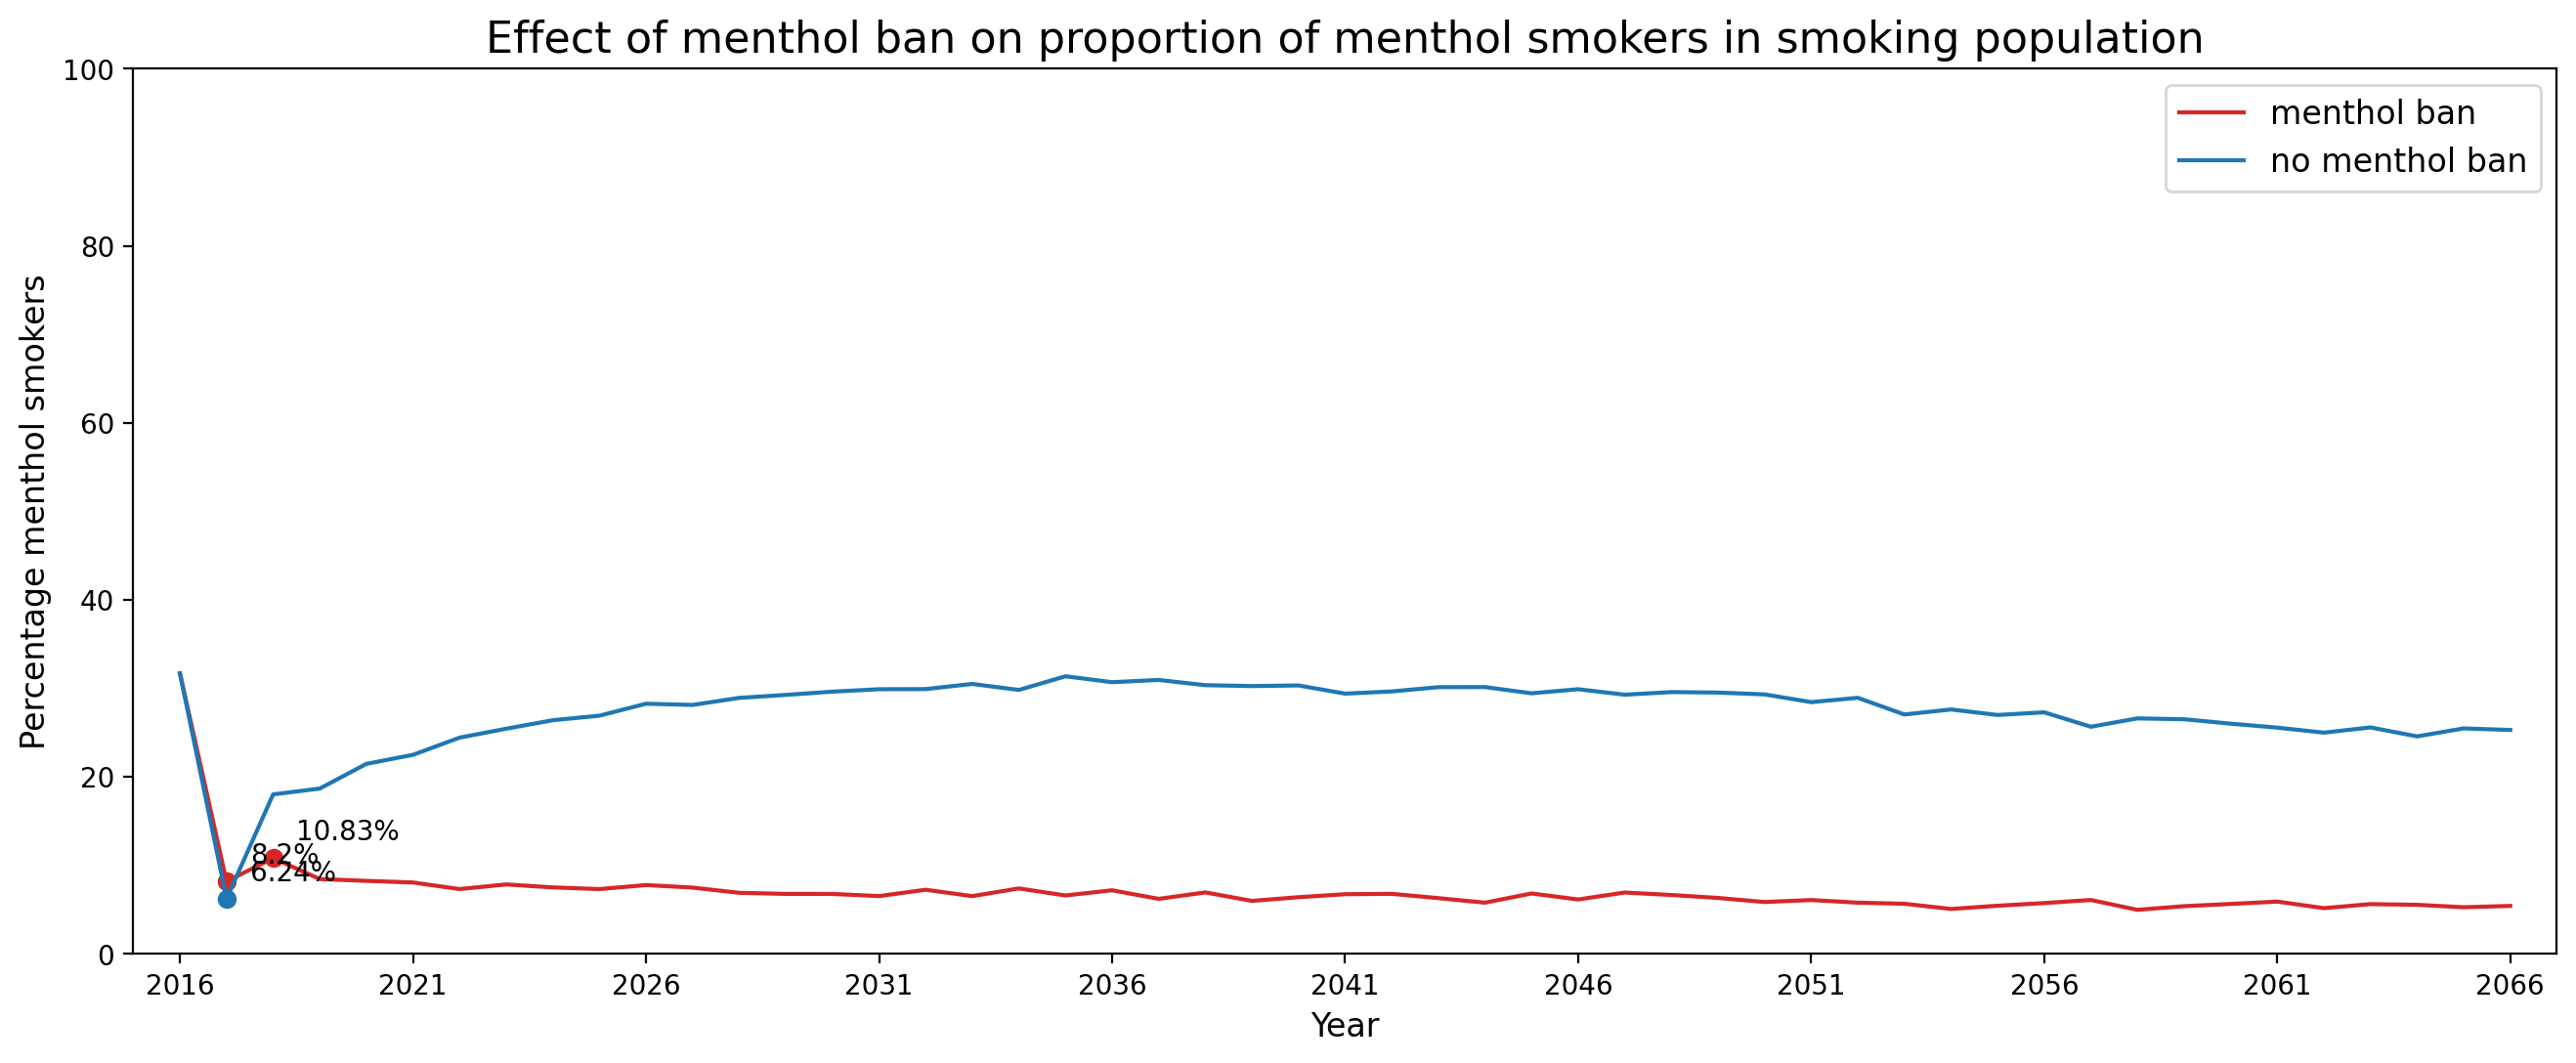

In [33]:
fig, ax = plt.subplots(1,1,figsize=(16,6), dpi=200)
y = arr_no_dead_percents[:,2] / np.sum(arr_no_dead_percents[:,2:], axis=1) * 100
y2 = arr2_no_dead_percents[:,2] / np.sum(arr2_no_dead_percents[:,2:], axis=1) * 100

ax.plot(x, y, mycolors[0])
ax.plot(x, y2, mycolors[1])

plt.ylim(0,100)
plt.xlim(x[0]-1, x[-1]+1)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage menthol smokers", fontsize=12)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
# ax.legend(["complex death rate", "average death rate"], fontsize=12, ncol=1)
ax.legend(["menthol ban", "no menthol ban"], fontsize=12, ncol=1)
for i,j in zip(x, y):
    # if (i - 2016) % 5 == 0:
    if i == 2017 or i == 2018:
        ax.annotate(str(int(j * 100) / 100) + "%", xy=(i + 0.5,j + 2))
        ax.scatter([i],[j],c=mycolors[0])
for i,j in zip(x, y2):
    # if (i - 2016) % 5 == 0:
    if i == 2017:
        ax.annotate(str(int(j * 100) / 100) + "%", xy=(i + 0.5,j + 2))
        ax.scatter([i],[j],c=mycolors[1])

plt.title("Effect of menthol ban on proportion of menthol smokers in smoking population", fontsize=16)